In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

In [113]:
url='https://raw.githubusercontent.com/WaTheDarknest/CSI/main/Dataset/Dataset/%E0%B8%8A%E0%B8%B1%E0%B9%89%E0%B8%992/TX1(%E0%B8%8A%E0%B8%B1%E0%B9%89%E0%B8%992)(%E0%B8%AB%E0%B9%89%E0%B8%AD%E0%B8%87%E0%B8%9B%E0%B8%81%E0%B8%95%E0%B8%B4)(40Sec).csv'
# อ่านข้อมูลไฟล์ csv จาก url
dataset=pd.read_csv(url)
dataset

<ipython-input-113-af3495d59782>:3: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset=pd.read_csv(url)


,real_timestamp,Delta t,Zone,R1,I1,Mag1,R2,I2,Mag2,R3,...,Mag61,R62,I62,Mag62,R63,I63,Mag63,R64,I64,Mag64
0,0.635934,-,1,28,-64,69.856997,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0.642724,0.00679,1,-99,-48,110.022725,9,0,9,0,...,0,0,0,0,0,0,0,0,0,0
2,0.656791,0.014067,1,-121,112,164.878743,8,0,8,0,...,0,0,0,0,0,0,0,0,0,0
3,0.668472,0.011681,1,-122,-31,125.876924,23,0,23,0,...,0,0,0,0,0,0,0,0,0,0
4,0.691587,0.023115,1,-122,-31,125.876924,23,0,23,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14421,39.959100,0.0139,4,84,-64,105.603030,4,0,4,0,...,0,0,0,0,0,0,0,0,0,0
14422,39.965200,0.0061,4,84,-64,105.603030,4,0,4,0,...,0,0,0,0,0,0,0,0,0,0
14423,39.973900,0.0087,4,84,-64,105.603030,4,0,4,0,...,0,0,0,0,0,0,0,0,0,0
14424,39.982200,0.0083,4,84,-64,105.603030,4,0,4,0,...,0,0,0,0,0,0,0,0,0,0


In [114]:
test_size=0.6
X_train, X_test, y_train, y_test = train_test_split(
    dataset[[ 'Mag7', 'Mag8', 'Mag9', 'Mag10', 'Mag11', 'Mag12', 'Mag13', 'Mag14', 'Mag15', 'Mag16', 'Mag17', 'Mag18', 'Mag19', 'Mag20'
          , 'Mag21', 'Mag22', 'Mag23', 'Mag24', 'Mag25', 'Mag26', 'Mag27', 'Mag28', 'Mag29', 'Mag30', 'Mag31', 'Mag32', 'Mag34', 'Mag35', 'Mag36', 'Mag37'
          , 'Mag38', 'Mag39', 'Mag40', 'Mag41', 'Mag42', 'Mag43', 'Mag44', 'Mag45', 'Mag46', 'Mag47' ,'Mag48', 'Mag49', 'Mag50', 'Mag51', 'Mag52', 'Mag53'
          , 'Mag54', 'Mag55', 'Mag56', 'Mag57', 'Mag58', 'Mag59']],
    dataset[['Zone']],
    test_size=test_size, random_state=8)

In [115]:
model=GaussianNB()
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [116]:
model.score(X_train, y_train)

0.541421143847487

In [117]:
model.score(X_test, y_test)

0.5404343807763401

In [118]:
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Accuracy: 0.539 (0.018)


In [119]:
predicted = model.predict(X_test)
y_test

,Zone
2589,1
3346,1
3344,1
9316,3
7493,3
...,...
8972,3
8369,3
11235,4
7368,2


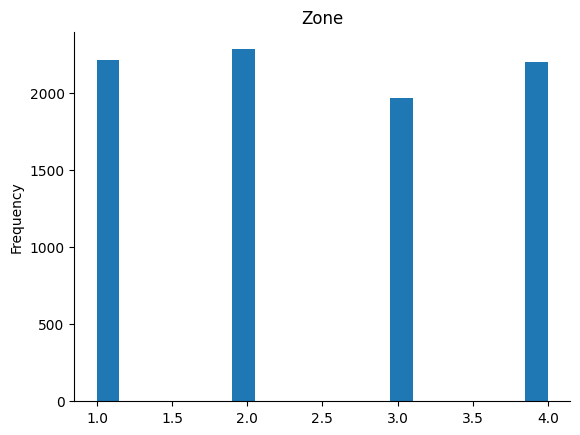

In [120]:
# @title Zone

from matplotlib import pyplot as plt
y_test['Zone'].plot(kind='hist', bins=20, title='Zone')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [121]:
predicted

array([1, 1, 1, ..., 4, 4, 2])

In [122]:
from sklearn import metrics
print(metrics.classification_report(y_test,predicted))

              precision    recall  f1-score   support

           1       0.83      0.81      0.82      2212
           2       0.80      0.35      0.48      2280
           3       0.31      0.40      0.35      1964
           4       0.44      0.60      0.50      2200

    accuracy                           0.54      8656
   macro avg       0.60      0.54      0.54      8656
weighted avg       0.61      0.54      0.55      8656

